In [13]:
from dotenv import load_dotenv
load_dotenv('/home/sergii/.env', override=True)

True

In [15]:
from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

In [22]:
# ?? create_react_agent

In [33]:
# Create the agent
memory = MemorySaver()
model = ChatOllama(model="llama3.3")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

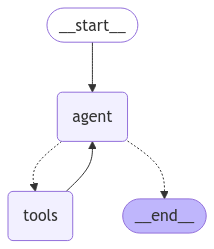

In [34]:
agent_executor

In [23]:

# Use the agent
config = {"configurable": {"thread_id": "abc1234"}}
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1', 'created_at': '2024-12-17T15:36:07.82294883Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1591120703, 'load_duration': 1335979173, 'prompt_eval_count': 197, 'prompt_eval_duration': 71000000, 'eval_count': 25, 'eval_duration': 181000000, 'message': Message(role='assistant', content='', images=None, tool_calls=[ToolCall(function=Function(name='tavily_search_results_json', arguments={'query': 'current events in San Francisco'}))])}, id='run-d1a41bf3-96cf-4ba0-9605-c93d3de9b09f-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current events in San Francisco'}, 'id': '1d5513cd-e10b-48eb-b70d-f79c9703c37a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 197, 'output_tokens': 25, 'total_tokens': 222})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://sfstandard.com/news/", "content": "Disrupt 1st Day of California Legisla

In [24]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1', 'created_at': '2024-12-17T15:36:45.444524047Z', 'done': True, 'done_reason': 'stop', 'total_duration': 251427536, 'load_duration': 13622333, 'prompt_eval_count': 1114, 'prompt_eval_duration': 18000000, 'eval_count': 25, 'eval_duration': 214000000, 'message': Message(role='assistant', content='', images=None, tool_calls=[ToolCall(function=Function(name='tavily_search_results_json', arguments={'query': 'current weather in San Francisco'}))])}, id='run-418fd631-3ba2-4d8c-94d5-97018f7e7644-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in San Francisco'}, 'id': 'b8fa190e-462d-4cac-b8c9-af7fa68e378d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1114, 'output_tokens': 25, 'total_tokens': 1139})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\': \'San Fra

In [35]:
async for event in agent_executor.astream_events(
    {"messages": [HumanMessage(content="whats the weather in sf?")]}, version="v1", config=config
):
    kind = event["event"]
    if kind == "on_chain_start":
        if (
            event["name"] == "Agent"
        ):  # Was assigned when creating the agent with `.with_config({"run_name": "Agent"})`
            print(
                f"Starting agent: {event['name']} with input: {event['data'].get('input')}"
            )
    elif kind == "on_chain_end":
        if (
            event["name"] == "Agent"
        ):  # Was assigned when creating the agent with `.with_config({"run_name": "Agent"})`
            print()
            print("--")
            print(
                f"Done agent: {event['name']} with output: {event['data'].get('output')['output']}"
            )
    if kind == "on_chat_model_stream":
        content = event["data"]["chunk"].content
        if content:
            # Empty content in the context of OpenAI means
            # that the model is asking for a tool to be invoked.
            # So we only print non-empty content
            print(content, end="|")
    elif kind == "on_tool_start":
        print("--")
        print(
            f"Starting tool: {event['name']} with inputs: {event['data'].get('input')}"
        )
    elif kind == "on_tool_end":
        print(f"Done tool: {event['name']}")
        print(f"Tool output was: {event['data'].get('output')}")
        print("--")

NotImplementedError in LogStreamCallbackHandler.on_llm_end callback: NotImplementedError('Trying to load an object that doesn\'t implement serialization: {\'lc\': 1, \'type\': \'not_implemented\', \'id\': [\'ollama\', \'_types\', \'Message\'], \'repr\': "Message(role=\'assistant\', content=\'\', images=None, tool_calls=[ToolCall(function=Function(name=\'tavily_search_results_json\', arguments={\'query\': \'San Francisco weather\'}))])"}')


--
Starting tool: tavily_search_results_json with inputs: {'query': 'San Francisco weather'}
Done tool: tavily_search_results_json
Tool output was: content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\': \'San Francisco\', \'region\': \'California\', \'country\': \'United States of America\', \'lat\': 37.775, \'lon\': -122.4183, \'tz_id\': \'America/Los_Angeles\', \'localtime_epoch\': 1734448840, \'localtime\': \'2024-12-17 07:20\'}, \'current\': {\'last_updated_epoch\': 1734448500, \'last_updated\': \'2024-12-17 07:15\', \'temp_c\': 10.6, \'temp_f\': 51.1, \'is_day\': 0, \'condition\': {\'text\': \'Mist\', \'icon\': \'//cdn.weatherapi.com/weather/64x64/night/143.png\', \'code\': 1030}, \'wind_mph\': 4.7, \'wind_kph\': 7.6, \'wind_degree\': 46, \'wind_dir\': \'NE\', \'pressure_mb\': 1026.0, \'pressure_in\': 30.31, \'precip_mm\': 0.0, \'precip_in\': 0.0, \'humidity\': 89, \'cloud\': 100, \'feelslike_c\': 9.8, \'feelslike_f\': 49.6, \'windchill_c\': 10.1, \

NotImplementedError in LogStreamCallbackHandler.on_llm_end callback: NotImplementedError('Trying to load an object that doesn\'t implement serialization: {\'lc\': 1, \'type\': \'not_implemented\', \'id\': [\'ollama\', \'_types\', \'Message\'], \'repr\': "Message(role=\'assistant\', content=\'The current weather in San Francisco is misty with a temperature of 51.1°F (10.6°C) and a humidity of 89%. The wind is blowing at 4.7 mph (7.6 kph) from the northeast, and there is no precipitation. It feels like 49.6°F (9.8°C) due to the wind chill.\', images=None, tool_calls=None)"}')
